## Import Libraries

In [1]:
import sys 
sys.path.append('C:/Users/yemre/Masaüstü/Data_Science_Projects/Churn_Prediction/src')

import pandas as pd 
import numpy as np

from data_analysis import DataAnalysis
from data_preprocessor import Preprocessor
from dataloader import DataLoader
from model_trainer import *
from model_evaluator import *


import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


C:\Users\yemre\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data and Preprocessing

#

In [2]:
data = DataLoader.get_data('../data/dataset.csv')

Data loaded from file path ../data/dataset.csv


In [3]:
print(f"data shape is {data.shape}")

data shape is (7043, 21)


## Categorize Columns

In [4]:
numeric_cols, categoric_cols, date_cols = DataAnalysis.categorize_columns(data=data)
print(f"numeric cols: \n{numeric_cols}")
print("*"*50)
print(f"categoric cols: \n{categoric_cols}")
print("*"*50)
print(f"date cols: \n{date_cols}")

Starting categorize columns...
numeric cols: 
['SeniorCitizen', 'tenure', 'MonthlyCharges']
**************************************************
categoric cols: 
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
**************************************************
date cols: 
[]


In [5]:
DataAnalysis.check_dtype_cols(data=data, col_types_list=numeric_cols)

SeniorCitizen type is int64
Check the first 3 rows of the column: 
0    0
1    0
2    0
Name: SeniorCitizen, dtype: int64
tenure type is int64
Check the first 3 rows of the column: 
0     1
1    34
2     2
Name: tenure, dtype: int64
MonthlyCharges type is float64
Check the first 3 rows of the column: 
0    29.85
1    56.95
2    53.85
Name: MonthlyCharges, dtype: float64


In [6]:
DataAnalysis.check_dtype_cols(data=data, col_types_list=categoric_cols)

customerID type is object
Check the first 3 rows of the column: 
0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
Name: customerID, dtype: object
gender type is object
Check the first 3 rows of the column: 
0    Female
1      Male
2      Male
Name: gender, dtype: object
Partner type is object
Check the first 3 rows of the column: 
0    Yes
1     No
2     No
Name: Partner, dtype: object
Dependents type is object
Check the first 3 rows of the column: 
0    No
1    No
2    No
Name: Dependents, dtype: object
PhoneService type is object
Check the first 3 rows of the column: 
0     No
1    Yes
2    Yes
Name: PhoneService, dtype: object
MultipleLines type is object
Check the first 3 rows of the column: 
0    No phone service
1                  No
2                  No
Name: MultipleLines, dtype: object
InternetService type is object
Check the first 3 rows of the column: 
0    DSL
1    DSL
2    DSL
Name: InternetService, dtype: object
OnlineSecurity type is object
Check the first 3 rows of the 

In [7]:
# Total Charges column has a object data type but it is numerical data, so let's change data type for this column.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Add TotalCharges in numeric list and remove it from categoric list
numeric_cols.append('TotalCharges')
categoric_cols.remove('TotalCharges')

## Descriptive Stats and Distributions for Numeric Features

In [8]:
#Check Descriptive Stats for Numeric Columns
DataAnalysis.descriptive_stats_for_numeric_cols(data=data.loc[:,numeric_cols])

,Feature_Name,Count,Missing_Count,Missing_Percentage,Min,Max,Std,25P,50P,75P,95P
0,SeniorCitizen,7043,0,0.0,0,1,0.368612,0.0,0.0,0.0,1.0
1,tenure,7043,0,0.0,0,72,24.559481,9.0,29.0,55.0,72.0
2,MonthlyCharges,7043,0,0.0,18.25,118.75,30.090047,35.5,70.35,89.85,107.4
3,TotalCharges,7032,11,0.001562,18.8,8684.8,2266.771362,401.45,1397.475,3794.7375,6923.59


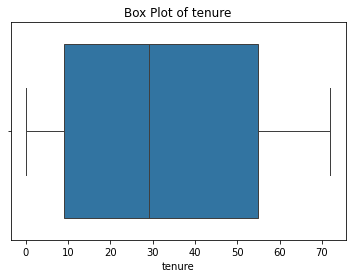

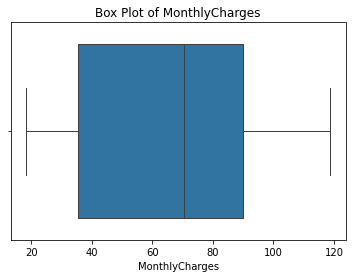

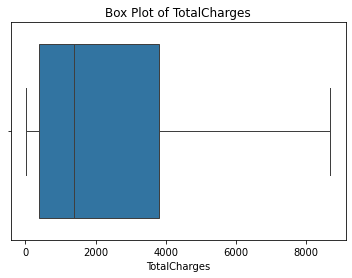

In [9]:
DataAnalysis.plot_boxplot(data=data, feature_name='tenure')
DataAnalysis.plot_boxplot(data=data, feature_name='MonthlyCharges')
DataAnalysis.plot_boxplot(data=data, feature_name='TotalCharges')

Tenure, MonthlyCharges, and TotalCharges have outliers. Should determine outlier values and fix them, especially for logistic regression.

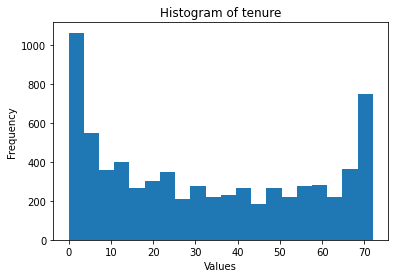

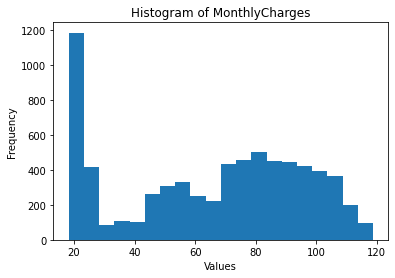

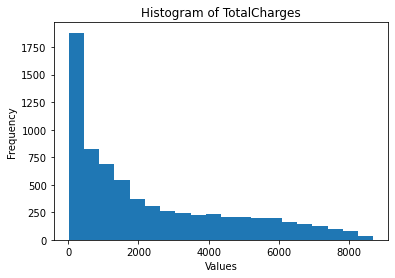

In [10]:
DataAnalysis.plot_histogram(data=data, feature_name='tenure')
DataAnalysis.plot_histogram(data=data, feature_name='MonthlyCharges')
DataAnalysis.plot_histogram(data=data, feature_name='TotalCharges')

All of the three numeric features have skewness. Especially TotalCharges is very skewed. 

## Analysis for Categoric Features

In [11]:
DataAnalysis.description_for_categoric_cols(data=data.loc[:,categoric_cols])

,Feature_Name,Count,Missing_Count,Missing_Percentage,Value_Counts,Number_Of_Unique,Mode
0,customerID,7043,0,0.0,7590-VHVEG 1 3791-LGQCY 1 6008-NAIXK ...,7043,0002-ORFBO
1,gender,7043,0,0.0,"Male 3555 Female 3488 Name: gender, dt...",2,Male
2,Partner,7043,0,0.0,"No 3641 Yes 3402 Name: Partner, dtype: ...",2,No
3,Dependents,7043,0,0.0,"No 4933 Yes 2110 Name: Dependents, dtyp...",2,No
4,PhoneService,7043,0,0.0,"Yes 6361 No 682 Name: PhoneService, dt...",2,Yes
5,MultipleLines,7043,0,0.0,No 3390 Yes 2...,3,No
6,InternetService,7043,0,0.0,Fiber optic 3096 DSL 2421 No ...,3,Fiber optic
7,OnlineSecurity,7043,0,0.0,No 3498 Yes ...,3,No
8,OnlineBackup,7043,0,0.0,No 3088 Yes ...,3,No
9,DeviceProtection,7043,0,0.0,No 3095 Yes ...,3,No


There are no ordinal or hierarchical relations for categorical features. Additionally, the number of unique values is not excessively high. Therefore, applying one-hot encoding would be more reasonable than using label encoding.

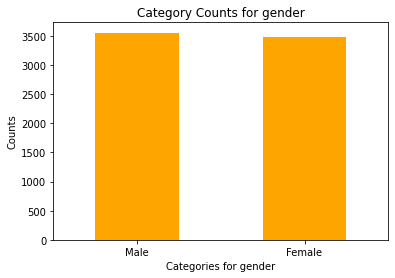

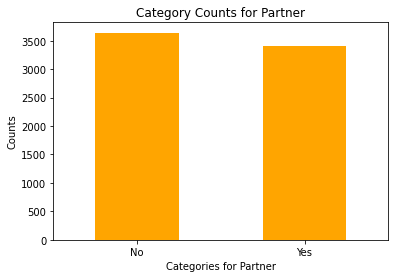

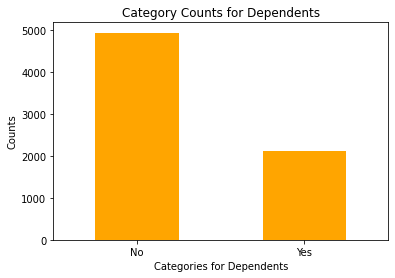

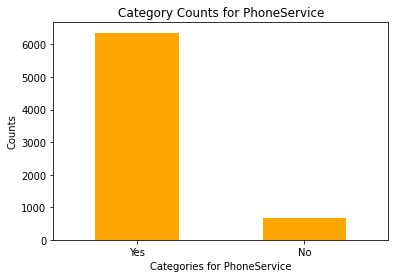

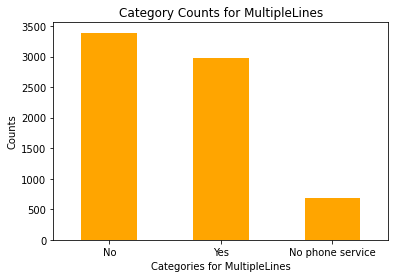

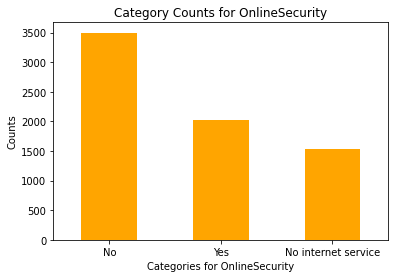

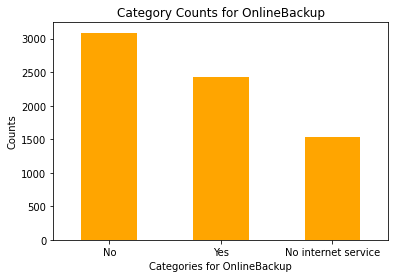

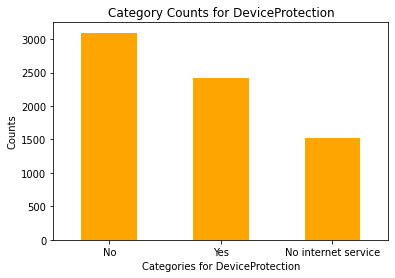

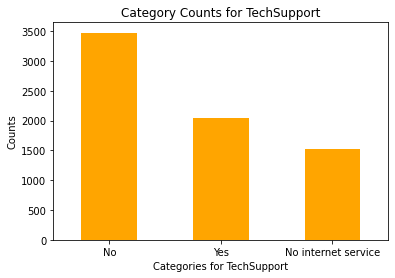

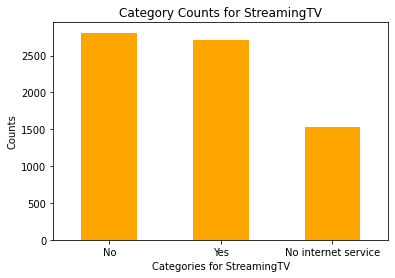

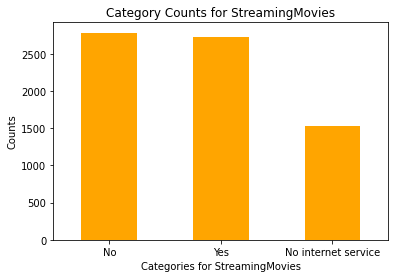

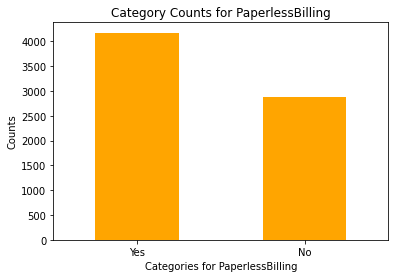

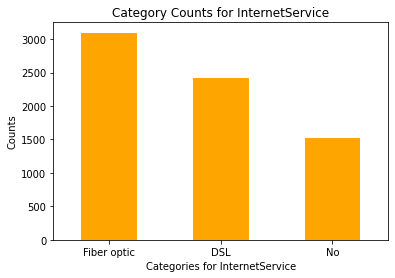

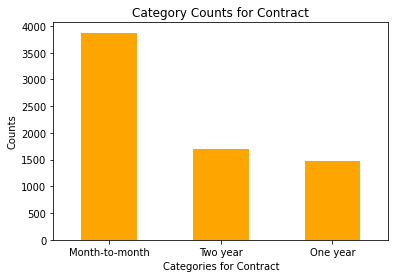

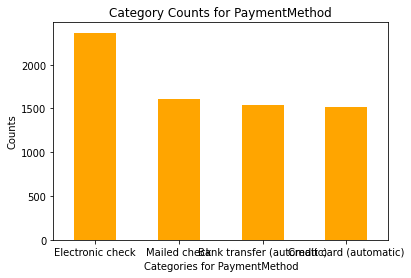

In [12]:
categoric_column_list = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", 
                         "DeviceProtection","TechSupport", "StreamingTV", "StreamingMovies","PaperlessBilling","InternetService",  
                         "Contract", "PaymentMethod"]

for column in categoric_column_list:
    DataAnalysis.bar_plot_categoric_feat(data=data, feature_name=column)

## Cardinality Issue for All Features

Low cordinality/Constant Column: 

A column that has the same value for every row in a dataset is often considered uninformative and can be a problem in data analysis or machine learning, as it doesn't provide any information.

High Cardinality: 

When each row in a dataset has a unique value. High cardinality features can present challenges for modeling, as they can lead to a large number of unique categories, which can make the data more difficult to work with.

In [13]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

The data has many constant features and columns with high cardinality problem.

Low cordinality columns:

Count column
Country column
State column
High cordinality columns:

CustomerID column.
Zip Code column.

## Imputation for Missing Values

In [14]:
#Before imputation, check duplicate columns and rows
print(f"Check duplicate columns: \n{Preprocessor.check_duplicate_cols(data)}")
print('*'*75)
print(f"Check duplicate rows: \n{Preprocessor.check_duplicate_rows(data)}")

Check duplicate columns: 
[]
***************************************************************************
Check duplicate rows: 
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [15]:
Preprocessor.return_only_missing_counts(data=data)

TotalCharges has 11 missing values.


In [16]:
# we have the number of months that the customer uses the service, Tenure Months, and Monthly Charges. we can replace null values with those calculated by monthly charges * tenure months
data['TotalCharges'].fillna(data['MonthlyCharges'] * data['tenure'], inplace=True)

## Encoding Part

In [17]:
# encode categorical data using one-hot encoding or label encoding
cols_to_use = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
              "TechSupport", "StreamingTV", "StreamingMovies","PaperlessBilling","InternetService",  "Contract", "PaymentMethod"]


for column in cols_to_use:
    data = Preprocessor.one_hot_encoder(data, column)

print(data.columns)

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 

## Split Data and Model Trials

In [18]:
# delete customerID columns
del data['customerID']
#Convert target feature to binary variable
data['Churn'] = pd.to_numeric(data['Churn'].replace({'No':0, 'Yes':1}))
y = data['Churn']
X = data.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = Preprocessor.split_data(X, y)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   Partner_No                               7043 non-null   uint8  
 7   Partner_Yes                              7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  PhoneService_No                          7043 no

In [19]:
#Calculate Univariate Gini for Feature Selection Part 
univariate_gini_scores = Preprocessor.calculate_univariate_gini(data,'Churn', X_test, y_test)
sorted_univariate_gini_scores = univariate_gini_scores.sort_values(by='Gini_Score', ascending=False)
print(sorted_univariate_gini_scores.head(15))

                            Feature_Name  Gini_Score
1                                 tenure    0.524989
38               Contract_Month-to-month    0.455682
2                         MonthlyCharges    0.434672
3                           TotalCharges    0.431132
24                        TechSupport_No    0.387310
15                     OnlineSecurity_No    0.381782
36           InternetService_Fiber optic    0.352394
43        PaymentMethod_Electronic check    0.348464
40                     Contract_Two year    0.303697
18                       OnlineBackup_No    0.289863
21                   DeviceProtection_No    0.285189
22  DeviceProtection_No internet service    0.215640
28       StreamingTV_No internet service    0.215640
25       TechSupport_No internet service    0.215640
19      OnlineBackup_No internet service    0.215640


 We can proceed with the first 15 features during model trials; however, since the total count of features is not high, no feature reduction method will be applied.


## Experiment on Different Models

We have many models to use:
grid search(computational high)/ random search (not good)


data manipulating

1. xgboost # can handle missing values # learn misclassification

use grid search 

optuna, hyperparameter tuning

website: xgboost

subsample 

2. Random Forest  # learn positive classification

use random/optima methods # comapre the two tuning method


3. Logistic regression # cannot handle missing/outliers/correlations

scaling methods

correlation implementation

category ratio, robust scaling, correlation methods

drop one if corr >50/70, with low gini score



### XGBoost

Cross Validation Score :  82.15%
ROC_AUC Score :  69.10%
Gini Score :  38.21%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



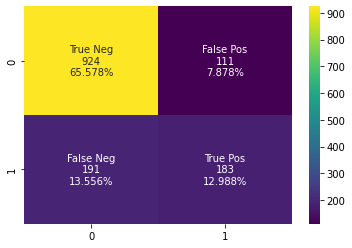

In [20]:
#Default Model for XGB
xgb_model = xgb.XGBClassifier()

ModelTrainer(xgb_model, X_train,y_train, X_test,y_test)
ModelEvaluator(xgb_model,X_test,y_test)

Best parameters: {'n_estimators': 198, 'max_depth': 2, 'min_child_weight': 2, 'gamma': 1.2461488533637736e-07, 'learning_rate': 0.0892944354687487, 'subsample': 0.9378363645096479, 'colsample_bytree': 0.3144127150298241}
Cross Validation Score :  84.78%
ROC_AUC Score :  72.04%
Gini Score :  44.07%
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.69      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



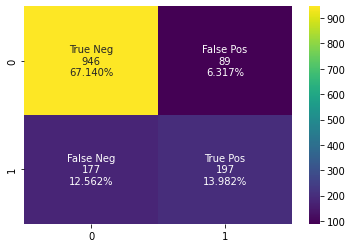

In [21]:
# XGB with Optuna 
import logging 
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # each trial information will not be seen.

def objective_xgb(trial,X_train, y_train, X_test, y_test):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 2, 25),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
    }

    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective_xgb(trial, X_train, y_train, X_test, y_test), n_trials=100)

best_params = study.best_trial.params
print("Best parameters:", best_params)


# Train the model with the best parameters
xgb_opt = xgb.XGBClassifier(**best_params)
ModelTrainer(xgb_opt, X_train, y_train, X_test, y_test)
ModelEvaluator(xgb_opt, X_test, y_test)


### Random Forest

Cross Validation Score :  82.09%
ROC_AUC Score :  67.76%
Gini Score :  35.53%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



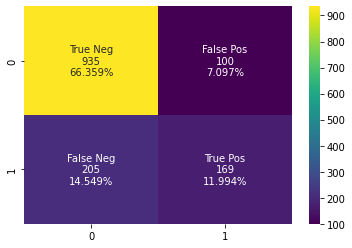

In [22]:
# Default Model for Random Forest
RanForCla = RandomForestClassifier()

ModelTrainer(RanForCla,X_train,y_train,X_test,y_test)
ModelEvaluator(RanForCla, X_test,y_test)

In [23]:
# Random Forest with GridSearch 
best_param, best_score = gridsearch(X=X, y=y, model=RanForCla)
print(f"Best Param of Random Forest with GridSearch : \n{best_param}")
print("*"*70)
print(f"Best Score of Random Forest with GridSearch : \n{best_score}")

Best Param of Random Forest with GridSearch : 
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
**********************************************************************
Best Score of Random Forest with GridSearch : 
0.8039657210401892


Cross Validation Score :  84.55%
ROC_AUC Score :  70.36%
Gini Score :  40.72%
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



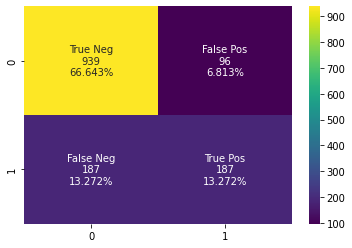

In [24]:
# Train the Random Forest model with the best parameters
rf_opt = RandomForestClassifier(**best_param) #best param from gridsearchCV
ModelTrainer(rf_opt, X_train, y_train, X_test, y_test)
ModelEvaluator(rf_opt, X_test, y_test)

### Logistic Regression

Cross Validation Score :  84.28%
ROC_AUC Score :  71.64%
Gini Score :  43.28%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



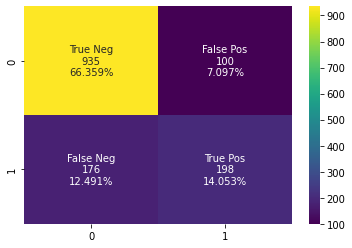

In [25]:
# Default Logistic Regression without Robust Scaling (Fixin Outliers, Correlation Elimination)
LR = LogisticRegression()

ModelTrainer(LR, X_train,y_train, X_test,y_test)
ModelEvaluator(LR,X_test,y_test)

In [30]:
## Correlation Elimination for Multicollinerity Problem 
drop_list, keep_list = Preprocessor.correlation_elimination(data=data.loc[:, numeric_cols], gini_df=sorted_univariate_gini_scores, threshold=0.60)
print(f"Drop List: \n{drop_list}")
print("*"*70)
print(f"Keep List: \n{keep_list}")

Drop List: 
['TotalCharges']
**********************************************************************
Keep List: 
['tenure', 'MonthlyCharges']


In [32]:
# Drop features for multicollinerity issue
df_after_corr = data.drop(columns= drop_list)
display(df_after_corr.head(3))

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1


In [37]:
# Apply Robust Scaling for Numeric Columns
numeric_list_lr = [feature for feature in numeric_cols if feature in df_after_corr.columns]
scaled_numeric_cols_df = Preprocessor.robust_scaler(data=df_after_corr.loc[:, numeric_list_lr])
display(scaled_numeric_cols_df.head(3))

,SeniorCitizen,tenure,MonthlyCharges
0,0.0,-0.608696,-0.745170
1,0.0,0.108696,-0.246550
2,0.0,-0.586957,-0.303588


In [38]:
drop_list_for_scaled = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
df_for_concat1 = df_after_corr.drop(columns=drop_list_for_scaled)
df_for_logistic_reg = pd.concat([scaled_numeric_cols_df, df_for_concat1], axis=1)
display(df_for_logistic_reg.head(3))

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,-0.608696,-0.745170,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
1,0.0,0.108696,-0.246550,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0.0,-0.586957,-0.303588,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1


In [39]:
# Split data for LR
y = df_for_logistic_reg['Churn']
X = df_for_logistic_reg.drop('Churn', axis=1)

X_train_lr, X_test_lr, y_train_lr, y_test_lr = Preprocessor.split_data(X, y)

Cross Validation Score :  84.21%
ROC_AUC Score :  72.31%
Gini Score :  44.62%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



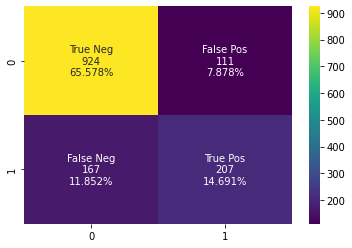

In [40]:
LR = LogisticRegression()

ModelTrainer(LR, X_train_lr,y_train_lr, X_test_lr,y_test_lr)
ModelEvaluator(LR, X_test_lr, y_test_lr)

### Result of the Models

According to Cross Validation Scores: 

Default XGB: 82.15% 
XGB with Optuna: 84.78% 

Default Random Forest: 82.09%
Random Forest with GridSearch: 84.55%

Default Logistic: 84.28%
Logistic with Corr Elimination & Scaling: 84.21% 